In [1]:
import pandas as pd

# Read the data
df = pd.DataFrame()
df = pd.concat([df, pd.read_parquet('data/Syn-training.parquet')])
df = pd.concat([df, pd.read_parquet('data/DNS-testing.parquet')])
df = pd.concat([df, pd.read_parquet('data/UDP-training.parquet')])
df['Label'].value_counts()

Syn          43302
Benign       32901
UDP          14792
DrDoS_DNS     3669
MSSQL          145
Name: Label, dtype: int64

In [13]:
# drop MSSQL as we do not need it for our study
df = df[df['Label'] != 'MSSQL']
df['Label'].value_counts()

Syn          3000
DrDoS_DNS    3000
UDP          3000
Benign       3000
Name: Label, dtype: int64

In [3]:
# keep a sample of 3K of Syn
balanced = pd.DataFrame()
balanced = pd.concat([balanced, df[df['Label'] == 'Syn'].sample(n=3000, random_state=42)])
balanced = pd.concat([balanced, df[df['Label'] == 'DrDoS_DNS'].sample(n=3000, random_state=42)])
balanced = pd.concat([balanced, df[df['Label'] == 'UDP'].sample(n=3000)])
balanced = pd.concat([balanced, df[df['Label'] == 'Benign'].sample(n=3000)])

In [4]:
df = balanced.copy()
del balanced
df['Label'].value_counts()

Syn          3000
DrDoS_DNS    3000
UDP          3000
Benign       3000
Name: Label, dtype: int64

### t-SNE

In [5]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# scatter plot the data
def plot_tsne(df_tsne):
    sns.scatterplot(x='PC1', y='PC2', hue='Label', data=df_tsne)
    plt.show()

https://towardsdatascience.com/how-to-tune-hyperparameters-of-tsne-7c0596a18868#:~:text=How%20to%20select%20optimal%20perplexity%3F

The optimal perplexity parameter depends on the number of samples in the dataset. As we have around 13k samples, we can try to set the perplexity to 100.

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 12000 samples in 0.007s...
[t-SNE] Computed neighbors for 12000 samples in 0.900s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12000
[t-SNE] Computed conditional probabilities for sample 2000 / 12000
[t-SNE] Computed conditional probabilities for sample 3000 / 12000
[t-SNE] Computed conditional probabilities for sample 4000 / 12000
[t-SNE] Computed conditional probabilities for sample 5000 / 12000
[t-SNE] Computed conditional probabilities for sample 6000 / 12000
[t-SNE] Computed conditional probabilities for sample 7000 / 12000
[t-SNE] Computed conditional probabilities for sample 8000 / 12000
[t-SNE] Computed conditional probabilities for sample 9000 / 12000
[t-SNE] Computed conditional probabilities for sample 10000 / 12000
[t-SNE] Computed conditional probabilities for sample 11000 / 12000
[t-SNE] Computed conditional probabilities for sample 12000 / 12000
[t-SNE] Mean sigma: 784.449465
[t-SNE] KL diverge

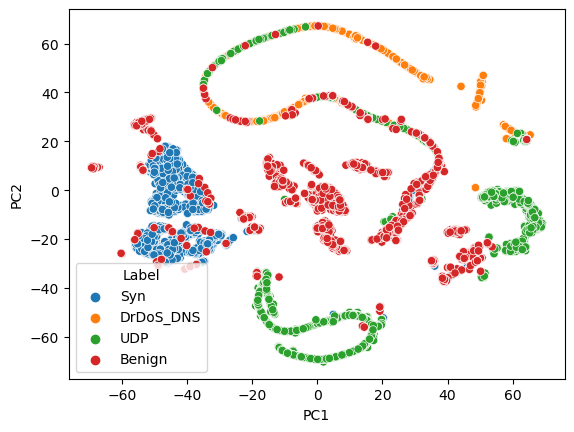

In [8]:
tsne100 = TSNE(n_components=2, verbose=1, random_state=123, perplexity=100)
df_tsne100 = pd.DataFrame(tsne100.fit_transform(df.drop('Label', axis=1)), columns=['PC1', 'PC2'])
df_tsne100['Label'] = df['Label'].values
plot_tsne(df_tsne100)

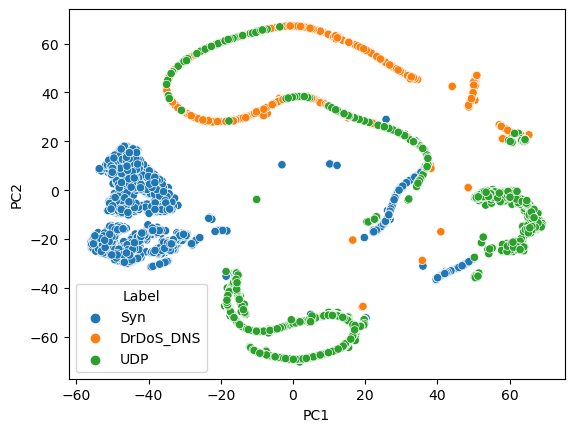

In [9]:
plot_tsne(df_tsne100[df_tsne100['Label'] != 'Benign'])

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 9000 samples in 0.003s...
[t-SNE] Computed neighbors for 9000 samples in 0.599s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9000
[t-SNE] Computed conditional probabilities for sample 2000 / 9000
[t-SNE] Computed conditional probabilities for sample 3000 / 9000
[t-SNE] Computed conditional probabilities for sample 4000 / 9000
[t-SNE] Computed conditional probabilities for sample 5000 / 9000
[t-SNE] Computed conditional probabilities for sample 6000 / 9000
[t-SNE] Computed conditional probabilities for sample 7000 / 9000
[t-SNE] Computed conditional probabilities for sample 8000 / 9000
[t-SNE] Computed conditional probabilities for sample 9000 / 9000
[t-SNE] Mean sigma: 702.536423
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.129013
[t-SNE] KL divergence after 1000 iterations: 0.338734


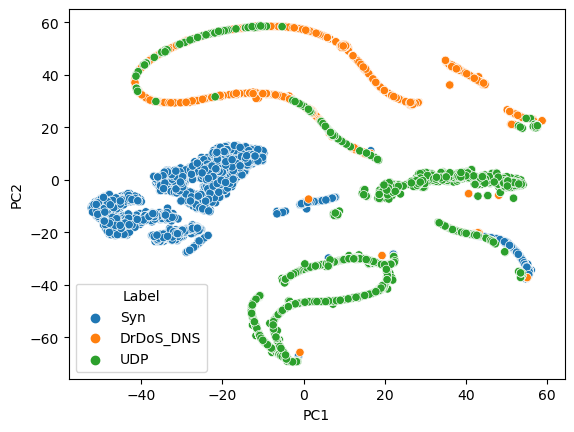

In [10]:
# fit t-SNE to the data
tsne = TSNE(n_components=2, verbose=1, random_state=123, perplexity=100)
df_tsne = pd.DataFrame(tsne.fit_transform(df[df['Label'] != 'Benign'].drop('Label', axis=1)), columns=['PC1', 'PC2'])
df_tsne['Label'] = df[df['Label'] != 'Benign']['Label'].values
plot_tsne(df_tsne)

In [11]:
df_tsne100.to_parquet('data/results/df_tsne.parquet')

In [12]:
df_tsne.to_parquet('data/results/df_tsne_no_benign.parquet')